<a href="https://colab.research.google.com/github/kothawadegs/Geospatial-Data-Processing/blob/master/landsat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import required packages
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
# defining a fucntion to read the data as array
def read_tif_asarray(band):
  temp_band = gdal.Open(band)
  array_band = temp_band.ReadAsArray()
  array_band_float = np.array(array_band, dtype=float)
  return array_band_float, temp_band

In [0]:
# reading data from tiff files
#band_red
band_red, raw_red = read_tif_asarray('/content/drive/My Drive/Geospatial Data/LC08_L1TP_045028_20191102_20191115_01_T1_B4.TIF')

In [0]:
#band NIR
band_nir, raw_nir = read_tif_asarray('/content/drive/My Drive/Geospatial Data/LC08_L1TP_045028_20191102_20191115_01_T1_B5.TIF')

In [7]:
band_red.shape, band_nir.shape

((7801, 7691), (7801, 7691))

In [9]:
!pip install rasterio

     |████████████████████████████████| 18.2MB 240kB/s 


In [0]:
# import ratserio package
import rasterio as rio
from rasterio import plot

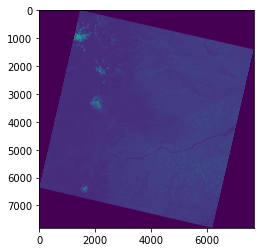

In [11]:
plot.show(band_red)

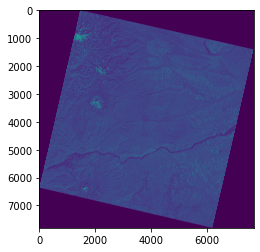

In [12]:
plot.show(band_nir)

In [0]:
# defining a function to calculate the NDVI
def calculate_NDVI(band_red, band_nir):
  check = np.logical_and (band_nir > 0, band_red > 0) # check for nan values in band_red and band_nir
  ndvi_arr = np.where(check, ((band_nir - band_red) / (band_nir + band_red)), -1)
  return ndvi_arr

In [17]:
ndvi = calculate_NDVI(band_nir=band_nir, band_red=band_red)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
ndvi.mean(), ndvi.min(), ndvi.max()

(-0.22009078491108205, -1.0, 0.5141077592675972)

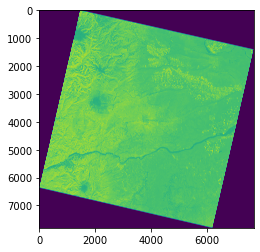

In [21]:
plot.show(ndvi)

In [0]:
def save_tif(var_calculated):
  driver = gdal.GetDriverByName('GTiff')
  shape = ndvi.shape
  path = 'outfile.tif'
  outFile = driver.Create(path, shape[1], shape[0], 1, gdal.GDT_Float32)
  geo = raw_red.GetGeoTransform
  prj = raw_red.GetProjection
  outFile.SetGeoTransform(geo)
  outFile.SetProjection(prj)
  outFile.GetRasterBand(1).WriteArray(var_calculated)
  outFile = None
  return path

In [27]:
save_tif(ndvi)

TypeError: ignored